In [1]:
install.packages("ggthemes")

package 'ggthemes' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\aliay\AppData\Local\Temp\RtmpGYIXyP\downloaded_packages


In [2]:
knitr::opts_chunk$set(echo=TRUE)

In [3]:
library(ggthemes)

Warning message:
"package 'ggthemes' was built under R version 3.6.3"Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [4]:
library(lubridate)


Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date



In [5]:
library(dplyr)


Attaching package: 'dplyr'

The following objects are masked from 'package:lubridate':

    intersect, setdiff, union

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [6]:
library(tidyr)

In [7]:
install.packages("DT")


  There is a binary version available but the source version is later:
   binary source needs_compilation
DT   0.18   0.19             FALSE



installing the source package 'DT'



In [8]:
library(DT)

In [9]:
library(scales)

In [10]:
colors = c("#CC1011", "#665555", "#05a399", "#cfcaca", "#f5e840", "#0683c9", "#e075b0")

In [11]:
apr_data <- read.csv("C:/Users/aliay/OneDrive/Desktop/uber analysis project/Uber-dataset/uber-raw-data-apr14.csv")
may_data <- read.csv("C:/Users/aliay/OneDrive/Desktop/uber analysis project/Uber-dataset/uber-raw-data-may14.csv")
jun_data <- read.csv("C:/Users/aliay/OneDrive/Desktop/uber analysis project/Uber-dataset/uber-raw-data-jun14.csv")
jul_data <- read.csv("C:/Users/aliay/OneDrive/Desktop/uber analysis project/Uber-dataset/uber-raw-data-jul14.csv")
aug_data <- read.csv("C:/Users/aliay/OneDrive/Desktop/uber analysis project/Uber-dataset/uber-raw-data-aug14.csv")
sep_data <- read.csv("C:/Users/aliay/OneDrive/Desktop/uber analysis project/Uber-dataset/uber-raw-data-sep14.csv")

In [12]:
data_2014 <- rbind(apr_data,may_data, jun_data, jul_data, aug_data, sep_data)
data_2014$Date.Time <- as.POSIXct(data_2014$Date.Time, format = "%m/%d/%Y %H:%M:%S")
data_2014$Time <- format(as.POSIXct(data_2014$Date.Time, format = "%m/%d/%Y %H:%M:%S"), format="%H:%M:%S")
data_2014$Date.Time <- ymd_hms(data_2014$Date.Time)
data_2014$day <- factor(day(data_2014$Date.Time))
data_2014$month <- factor(month(data_2014$Date.Time, label = TRUE))
data_2014$year <- factor(year(data_2014$Date.Time))
data_2014$dayofweek <- factor(wday(data_2014$Date.Time, label = TRUE))

In [13]:
data_2014$hour <- factor(hour(hms(data_2014$Time)))
data_2014$minute <- factor(minute(hms(data_2014$Time)))
data_2014$second <- factor(second(hms(data_2014$Time)))

In [14]:
hour_data <- data_2014 %>%
           group_by(hour) %>%
               dplyr::summarize(Total = n()) 
datatable(hour_data)

HTML widgets cannot be represented in plain text (need html)

In [17]:
install.packages("ggplot2")

also installing the dependencies 'isoband', 'rlang'




  There are binary versions available but the source versions are later:
        binary source needs_compilation
isoband  0.2.4  0.2.5              TRUE
ggplot2  3.3.3  3.3.5             FALSE

  Binaries will be installed
package 'isoband' successfully unpacked and MD5 sums checked
package 'rlang' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'rlang'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying D:\anaconda\envs\rstudios\Lib\R\library\00LOCK\rlang\libs\x64\rlang.dll to D:\anaconda\envs\rstudios\Lib\R\library\rlang\libs\x64\rlang.dll: Permission denied"Warning message:
"restored 'rlang'"


The downloaded binary packages are in
	C:\Users\aliay\AppData\Local\Temp\RtmpGYIXyP\downloaded_packages


installing the source package 'ggplot2'

Warning message in install.packages("ggplot2"):
"installation of package 'ggplot2' had non-zero exit status"

In [20]:
library(ggplot2)

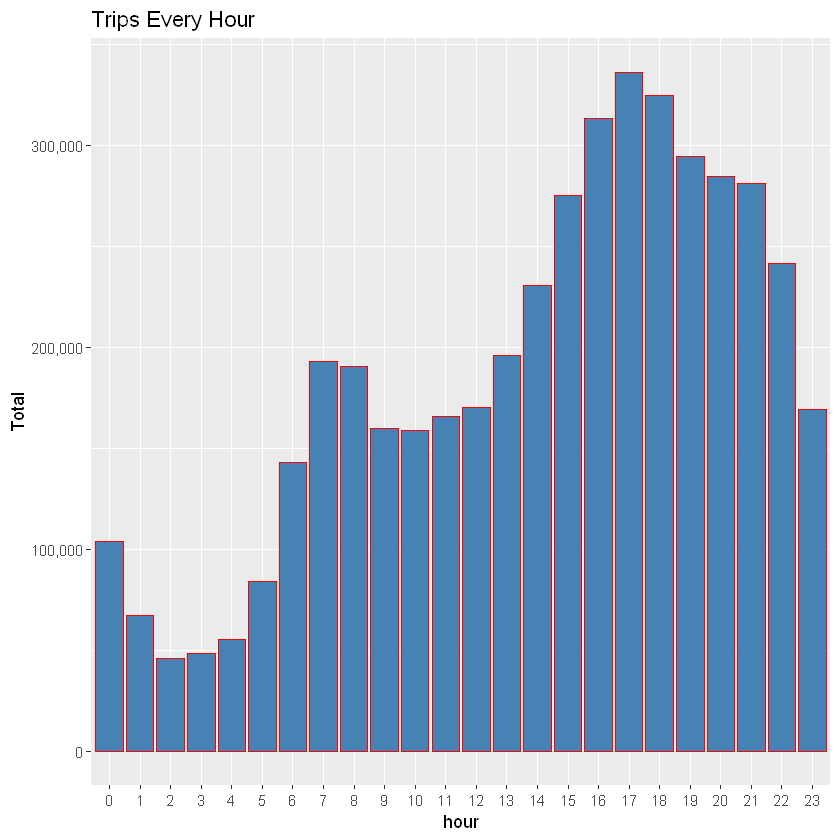

In [21]:
ggplot(hour_data, aes(hour, Total)) + 
        geom_bar( stat = "identity", fill = "steelblue", color = "red") +
           ggtitle("Trips Every Hour") +
            theme(legend.position = "none") +
            scale_y_continuous(labels = comma)

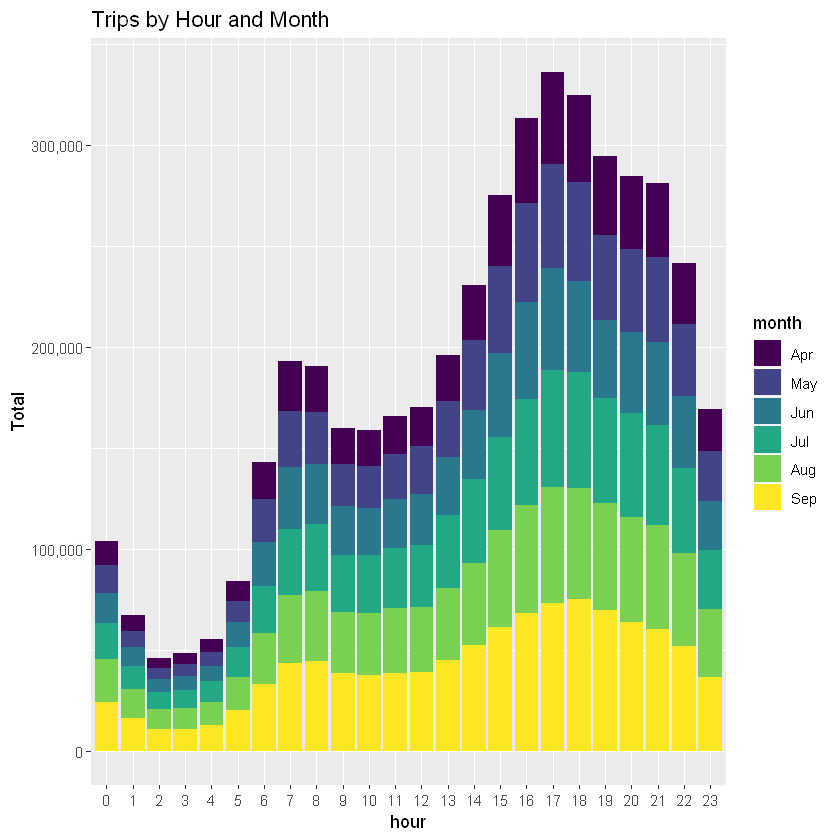

In [22]:
month_hour <- data_2014 %>%
          group_by(month, hour) %>%
             dplyr::summarize(Total = n())
ggplot(month_hour, aes(hour, Total, fill = month)) + 
       geom_bar( stat = "identity") +
          ggtitle("Trips by Hour and Month") +
           scale_y_continuous(labels = comma)

HTML widgets cannot be represented in plain text (need html)

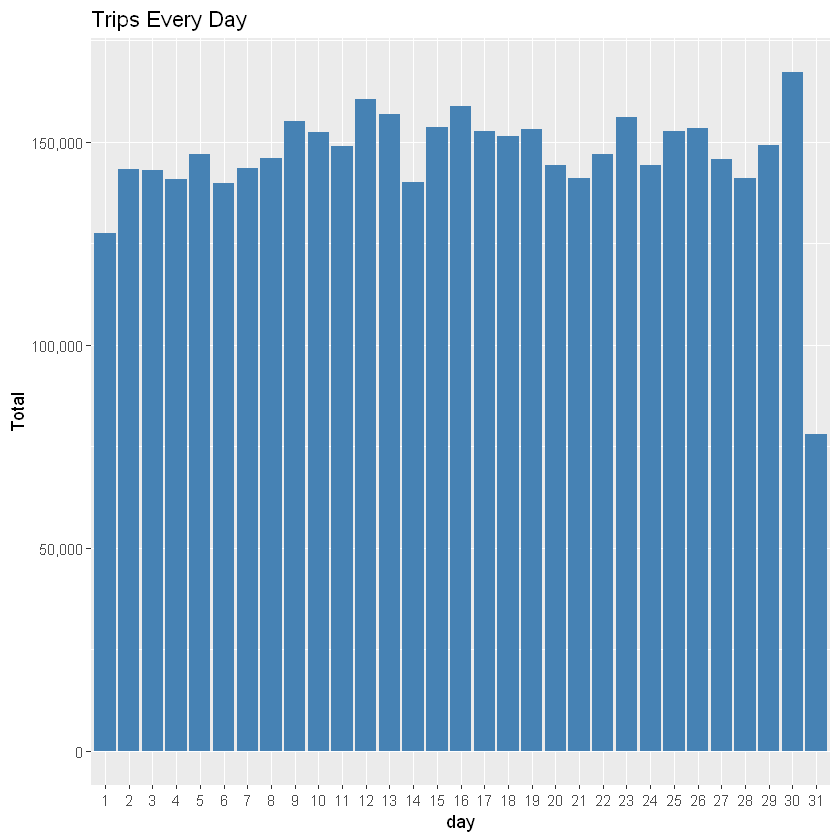

In [23]:
day_group <- data_2014 %>%
          group_by(day) %>%
             dplyr::summarize(Total = n()) 
datatable(day_group)
ggplot(day_group, aes(day, Total)) + 
        geom_bar( stat = "identity", fill = "steelblue") +
           ggtitle("Trips Every Day") +
            theme(legend.position = "none") +
            scale_y_continuous(labels = comma)

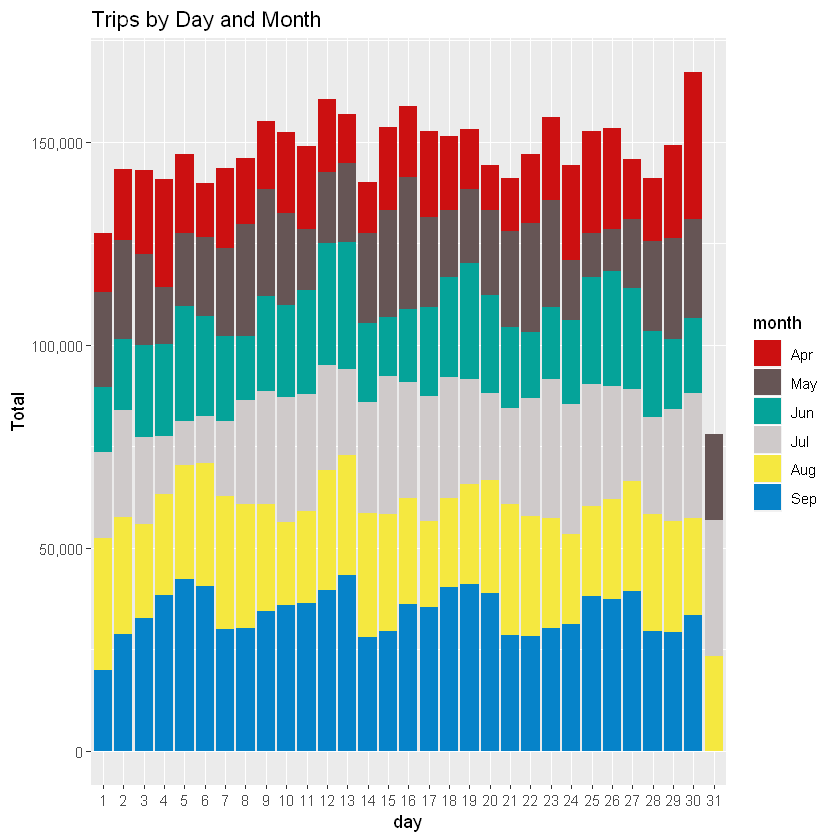

In [24]:
day_month_group <- data_2014 %>%
         group_by(month, day) %>%
             dplyr::summarize(Total = n())
ggplot(day_month_group, aes(day, Total, fill = month)) + 
        geom_bar( stat = "identity") +
           ggtitle("Trips by Day and Month") +
            scale_y_continuous(labels = comma) +
            scale_fill_manual(values = colors)

HTML widgets cannot be represented in plain text (need html)

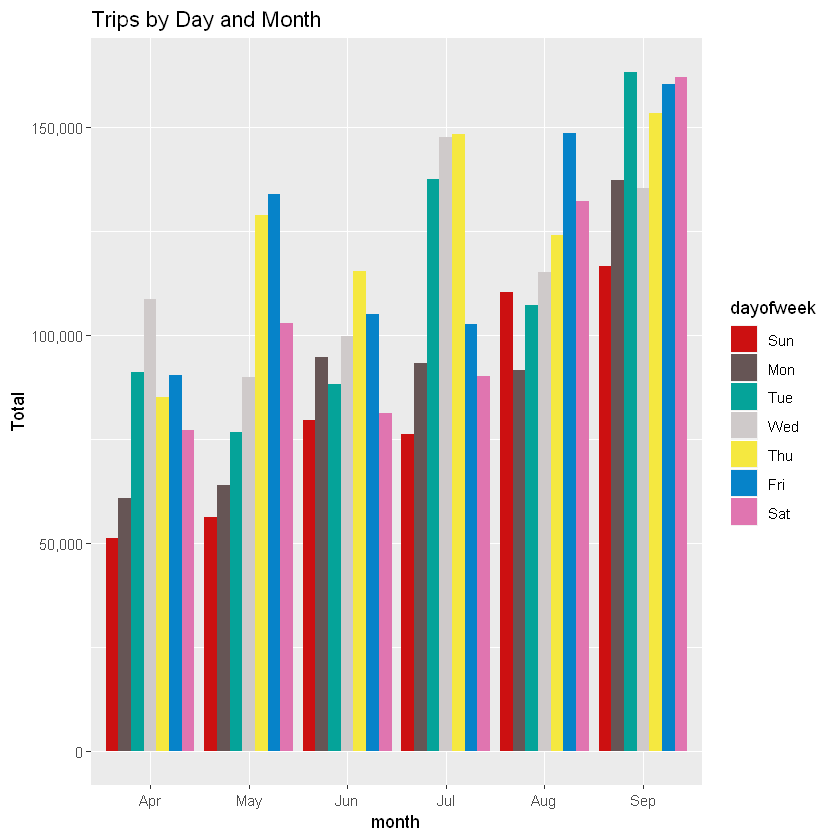

In [25]:
month_group <- data_2014 %>%
          group_by(month) %>%
             dplyr::summarize(Total = n()) 
datatable(month_group)
month_weekday <- data_2014 %>%
         group_by(month, dayofweek) %>%
             dplyr::summarize(Total = n())
ggplot(month_weekday, aes(month, Total, fill = dayofweek)) + 
       geom_bar( stat = "identity", position = "dodge") +
          ggtitle("Trips by Day and Month") +
           scale_y_continuous(labels = comma) +
           scale_fill_manual(values = colors)

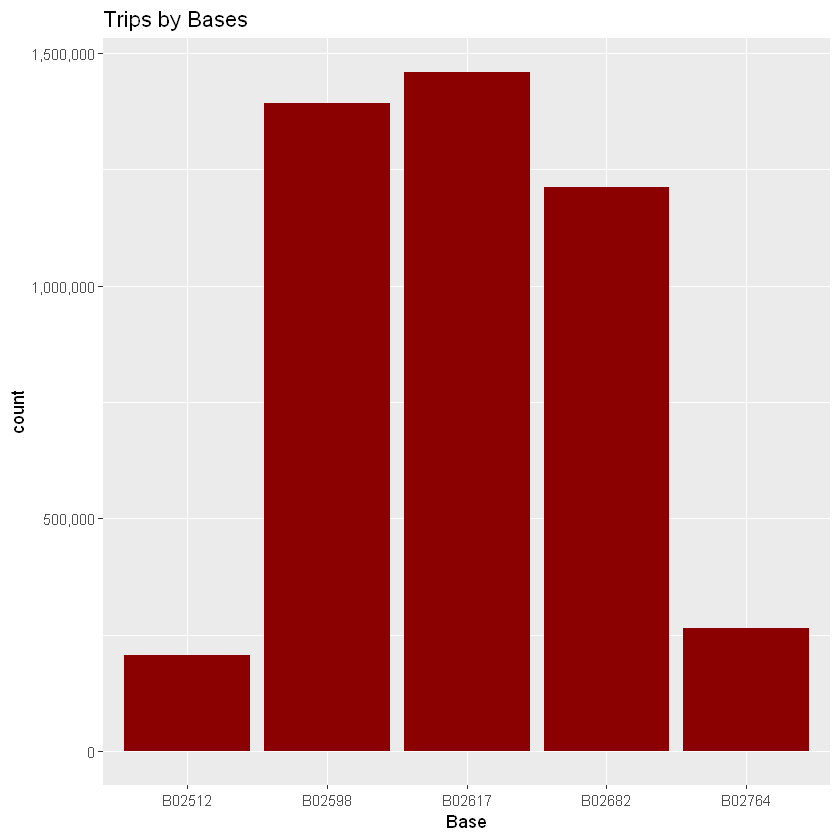

In [26]:
ggplot(data_2014, aes(Base)) + 
 geom_bar(fill = "darkred") +
 scale_y_continuous(labels = comma) +
 ggtitle("Trips by Bases")


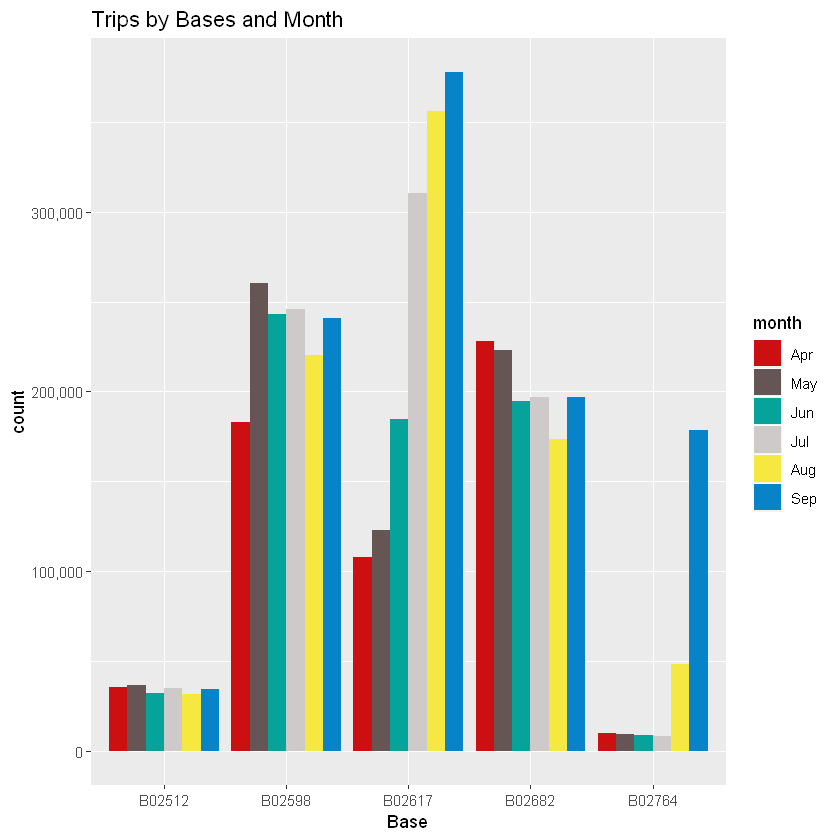

In [27]:

ggplot(data_2014, aes(Base, fill = month)) + 
 geom_bar(position = "dodge") +
 scale_y_continuous(labels = comma) +
 ggtitle("Trips by Bases and Month") +
 scale_fill_manual(values = colors)

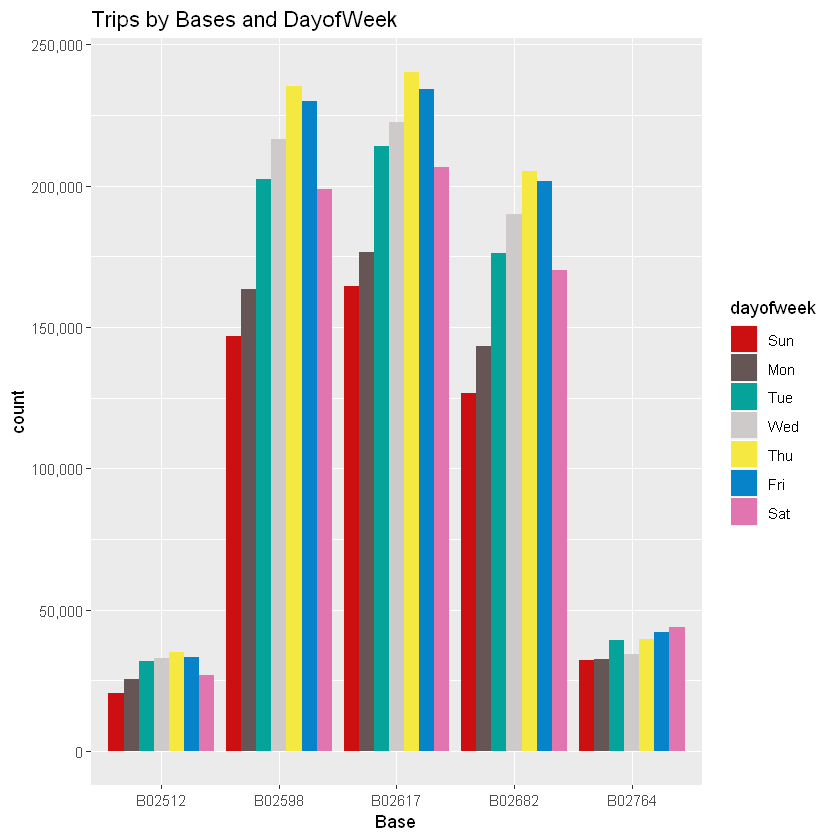

In [28]:
ggplot(data_2014, aes(Base, fill = dayofweek)) + 
 geom_bar(position = "dodge") +
 scale_y_continuous(labels = comma) +
 ggtitle("Trips by Bases and DayofWeek") +
 scale_fill_manual(values = colors)

HTML widgets cannot be represented in plain text (need html)

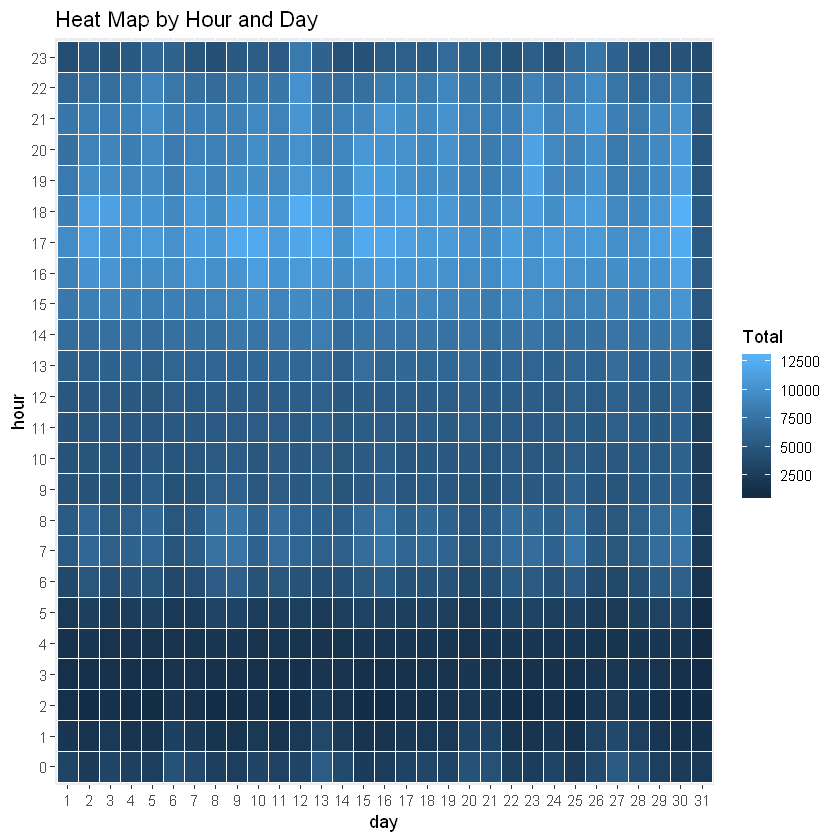

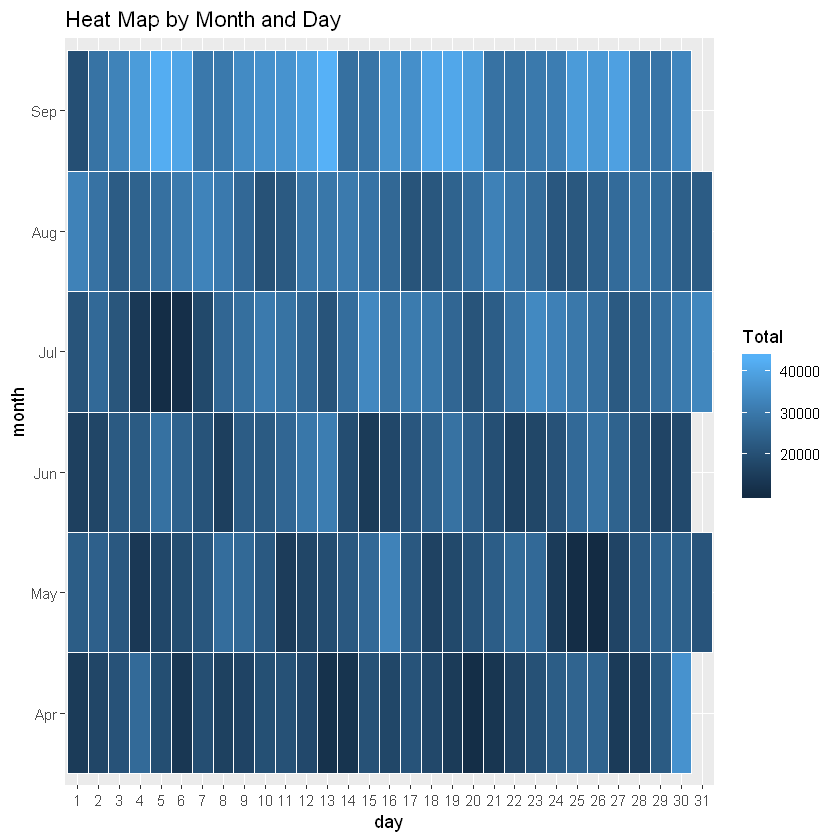

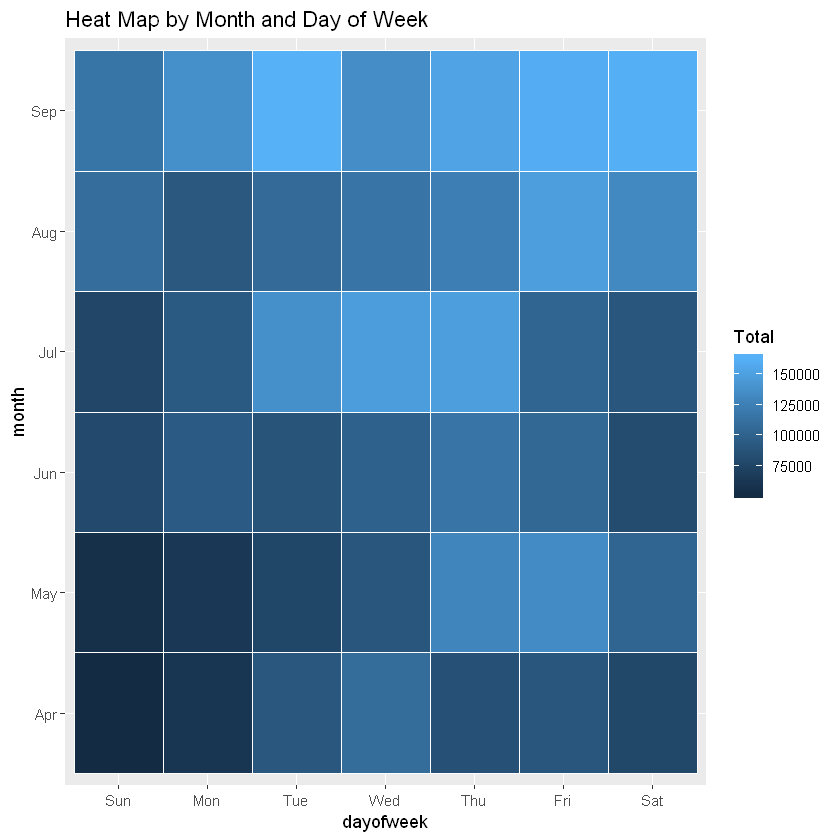

In [31]:
day_and_hour <- data_2014 %>%
         group_by(day, hour) %>%
            dplyr::summarize(Total = n())
datatable(day_and_hour)
ggplot(day_and_hour, aes(day, hour, fill = Total)) +
            geom_tile(color = "white") +
              ggtitle("Heat Map by Hour and Day")

ggplot(day_month_group, aes(day, month, fill = Total)) +
            geom_tile(color = "white") +
              ggtitle("Heat Map by Month and Day")

ggplot(month_weekday, aes(dayofweek, month, fill = Total)) +
            geom_tile(color = "white") +
              ggtitle("Heat Map by Month and Day of Week")

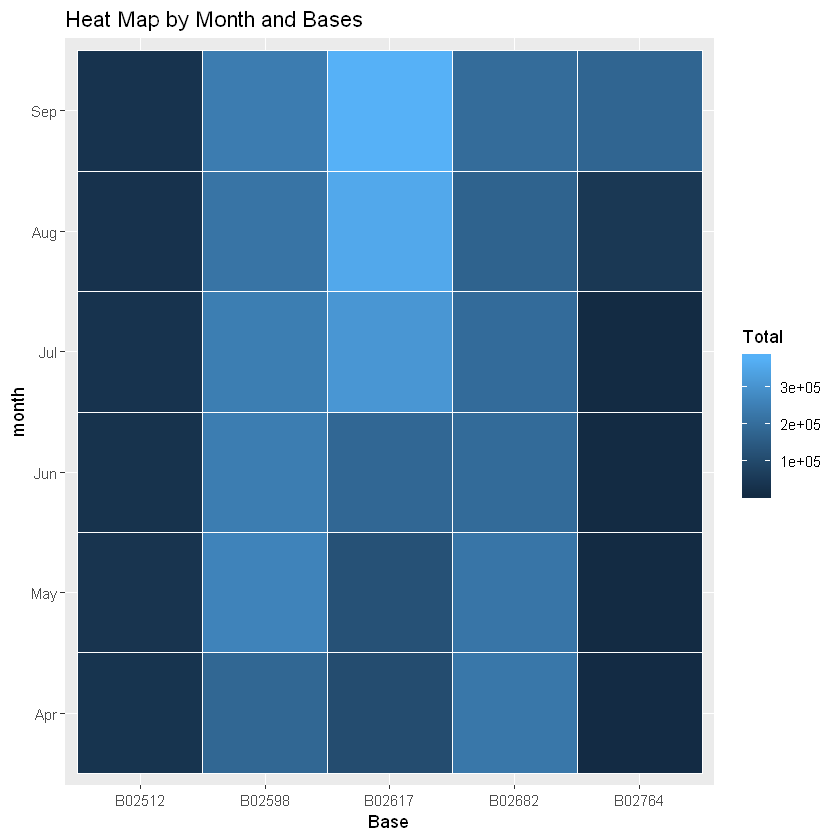

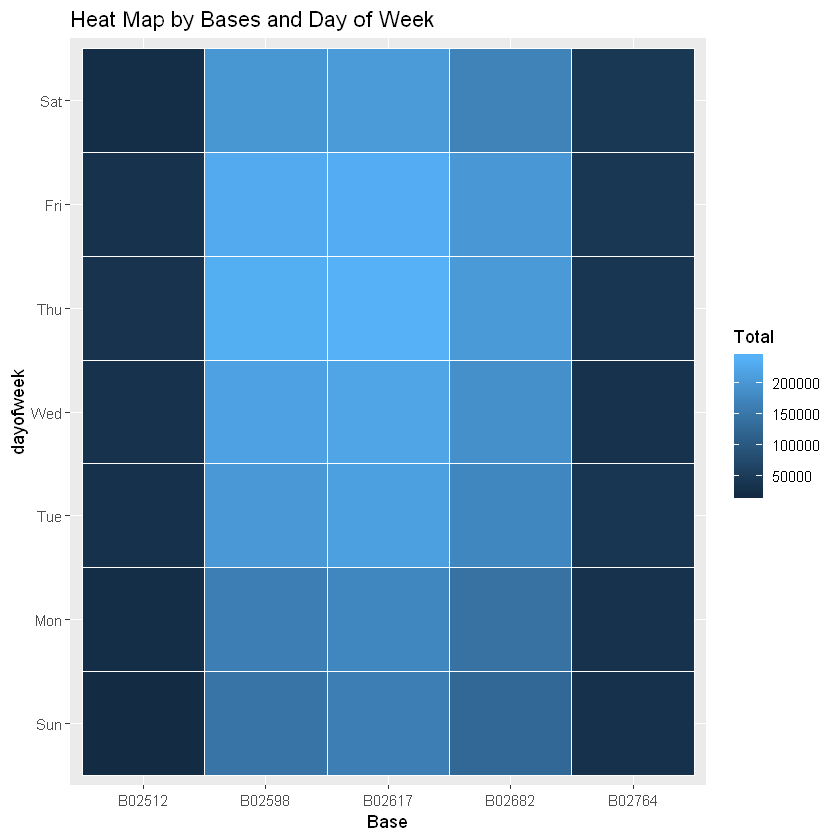

In [33]:
month_base <-  data_2014 %>%
                    group_by(Base, month) %>%
                        dplyr::summarize(Total = n()) 
day0fweek_bases <-  data_2014 %>%
                    group_by(Base, dayofweek) %>%
                        dplyr::summarize(Total = n()) 
ggplot(month_base, aes(Base, month, fill = Total)) +
            geom_tile(color = "white") +
              ggtitle("Heat Map by Month and Bases")

ggplot(day0fweek_bases, aes(Base, dayofweek, fill = Total)) +
            geom_tile(color = "white") +
              ggtitle("Heat Map by Bases and Day of Week")

Warning message:
"Removed 71701 rows containing missing values (geom_point)."

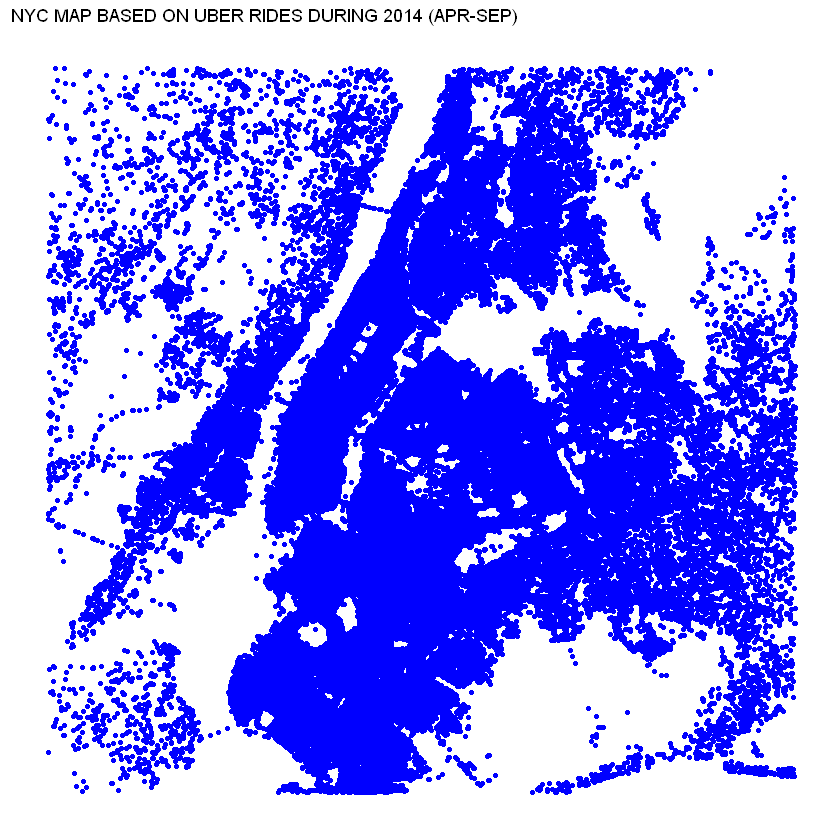

In [34]:
min_lat <- 40.5774
max_lat <- 40.9176
min_long <- -74.15
max_long <- -73.7004
ggplot(data_2014, aes(x=Lon, y=Lat)) +
  geom_point(size=1, color = "blue") +
     scale_x_continuous(limits=c(min_long, max_long)) +
      scale_y_continuous(limits=c(min_lat, max_lat)) +
        theme_map() +
           ggtitle("NYC MAP BASED ON UBER RIDES DURING 2014 (APR-SEP)")

Warning message:
"Removed 71701 rows containing missing values (geom_point)."

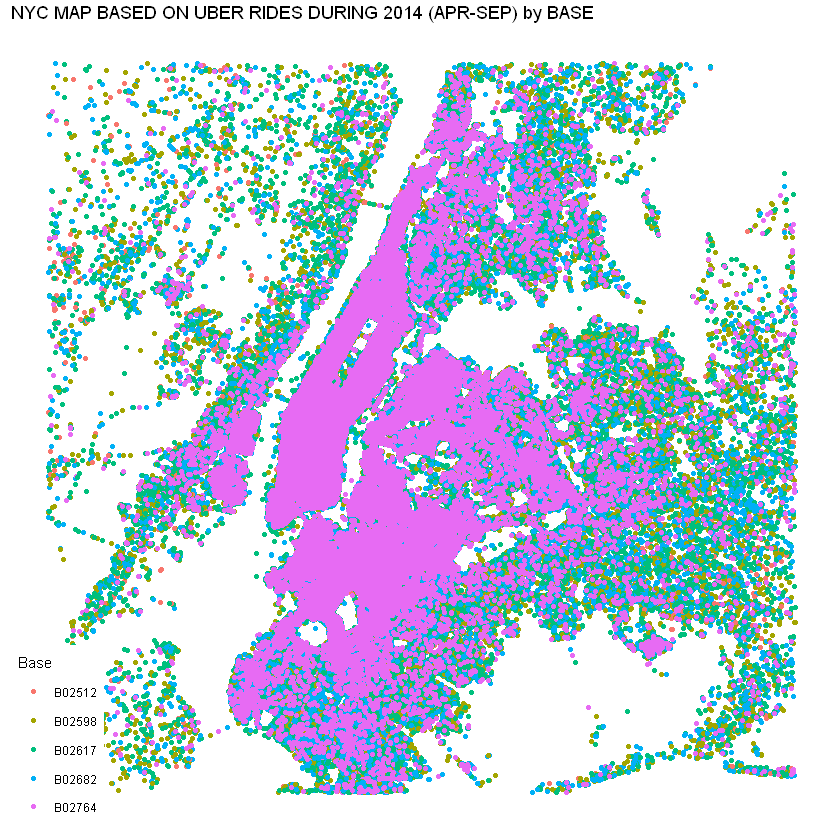

In [35]:
ggplot(data_2014, aes(x=Lon, y=Lat, color = Base)) +
  geom_point(size=1) +
     scale_x_continuous(limits=c(min_long, max_long)) +
      scale_y_continuous(limits=c(min_lat, max_lat)) +
       theme_map() +
          ggtitle("NYC MAP BASED ON UBER RIDES DURING 2014 (APR-SEP) by BASE")